# Setup Code


In [211]:
# ECGR 5105 Homework 2
# Aidan Dattada

# Setup Code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Function definitions
def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations):
    m = len(y_train)  # Number of training examples
    train_cost_history = np.zeros(iterations)
    test_cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (alpha / m) * X_train.transpose().dot(errors)
        theta -= sum_delta
        train_cost_history[i] = compute_cost(X_train, y_train, theta)
        test_cost_history[i] = compute_cost(X_test, y_test, theta)

    return theta, train_cost_history, test_cost_history

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def data_map(x):
  return x.map({'yes': 1, 'no' : 0, 'furnished' : 1, 'semi-furnished' : 0.5, 'unfurnished' : 0})

# Get data from CSV
housing_data = pd.read_csv('https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv')

# Preprocessing
housing_data.isnull().sum()*100/housing_data.shape[0] # Check for null values
## The raw data has a lot of strings in it: "yes", "no", "furnished", "unfurnished"
## We use a map to convert these to 1s and 0s
data_nan_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'] #, 'furnishingstatus'
housing_data[data_nan_columns] = housing_data[data_nan_columns].apply(data_map)
## We need to scale the data so each category is weighted evenly
scaler = MinMaxScaler()
data_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
housing_data[data_cols] = scaler.fit_transform(housing_data[data_cols])

iterations = 1500
alpha = 0.05

# Problem 1


Problem 1 (30 points)

1.a) Develop a gradient descent training and evaluation code, from scratch, that predicts housing price based on the following input variables:
- area
- bedrooms
- bathrooms
- stories
- parking

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines). For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

For variables area, bedrooms, bathrooms, stories, parking
Final value of theta = [[0.05894073]
 [0.34071016]
 [0.0768306 ]
 [0.29241887]
 [0.14194485]
 [0.10720423]]
for training dataset, cost_history = 0.0058055285694531295
for validation dataset, cost_history = 0.005759372453343346




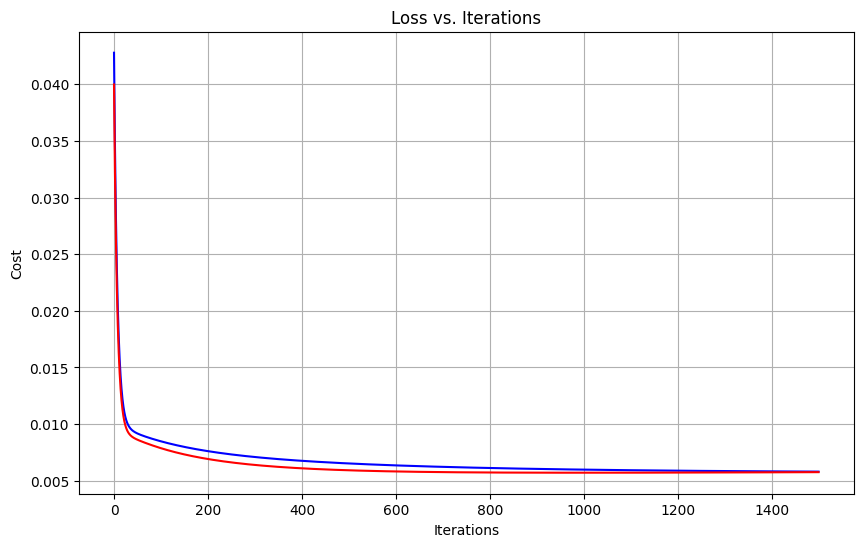

In [212]:
## The assignment calls for a 80/20 train/test split
np.random.seed(0) # is this necessary?
data_train, data_test = train_test_split(housing_data, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

y_train = data_train.pop('price').values.reshape(-1,1)
X1_train = data_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
X1_train = np.column_stack((np.ones(X1_train.shape[0]), X1_train))

y_test = data_test.pop('price').values.reshape(-1,1)
X1_test = data_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
X1_test = np.column_stack((np.ones(X1_test.shape[0]), X1_test))

# Linear regression for explanatory variables area, bedrooms, bathrooms, stories, parking
theta = np.zeros((X1_train.shape[1], 1)) # this vector stores the model parameters

# calculate linear regression for feature matrix using gradient descent
theta, train_cost_history, test_cost_history = gradient_descent(X1_train, y_train, X1_test, y_test, theta, alpha, iterations)
#theta, cost_history = gradient_descent(feature_mat, Y, theta, alpha, iterations)
print('For variables area, bedrooms, bathrooms, stories, parking')
print('Final value of theta =', theta)
print('for training dataset, cost_history =', train_cost_history[-1])
print('for validation dataset, cost_history =', test_cost_history[-1])
print('\n')

# Plot loss over iterations
plt.clf()
plt.plot(range(iterations), train_cost_history, color='blue')
plt.plot(range(iterations), test_cost_history, color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.show()

1.b) Develop a gradient decent training and evaluation code, from scratch, that predicts housing price based on the following input variables:

Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

Identify the best parameters for your linear regression model, based on the above input variables.

Plot the training and validation losses (in a single graph, but two different lines) over your training iteration. Compare your linear regression model against problem 1 a. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (thetas to zero). For the training iteration, choose what you believe fits the best.

Final Theta Value:  [[-0.00103726]
 [ 0.23828184]
 [ 0.0649387 ]
 [ 0.26026017]
 [ 0.11147125]
 [ 0.05752665]
 [ 0.03903092]
 [ 0.02578724]
 [ 0.07934154]
 [ 0.07946374]
 [ 0.0821614 ]
 [ 0.05610351]]
Final Train Cost:  [0.03851538 0.03140436 0.02596002 ... 0.00437433 0.0043742  0.00437407]
Final Test Cost:  [0.03575456 0.02889684 0.02368047 ... 0.0042073  0.00420739 0.00420748]


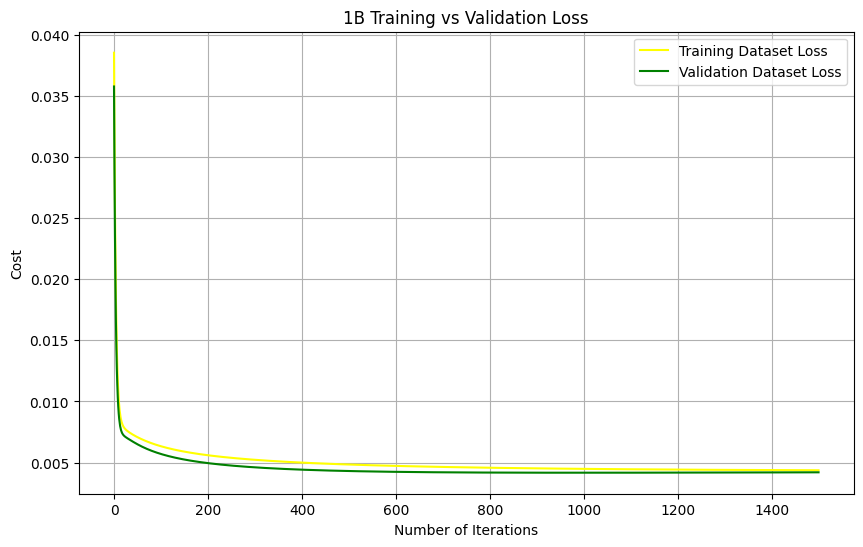

In [213]:
data_train, data_test = train_test_split(housing_data, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

y_train = data_train.pop('price').values.reshape(-1,1)
X_train = data_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

y_test = data_test.pop('price').values.reshape(-1,1)
X_test = data_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

theta = np.zeros((X_train.shape[1], 1))
theta, train_cost_history, test_cost_history = gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations)

print('Final Theta Value: ', theta)
print('Final Train Cost: ', train_cost_history)
print('Final Test Cost: ', test_cost_history)

# Data visualization
plt.clf()
plt.plot(range(iterations),train_cost_history, color='yellow', label='Training Dataset Loss')
plt.plot(range(iterations),test_cost_history, color='green', label='Validation Dataset Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('1B Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Problem 2

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

For variables area, bedrooms, bathrooms, stories, parking
Final value of theta for normalized dataset = [[0.00147502]
 [0.        ]
 [0.2382325 ]
 [0.06522106]
 [0.25996873]
 [0.11154345]
 [0.05740092]
 [0.03889865]
 [0.02584072]
 [0.07934757]
 [0.07935955]
 [0.08175861]
 [0.05594393]]
Final value of theta for standardized dataset = [[0.2636995 ]
 [0.        ]
 [0.04613296]
 [0.0062963 ]
 [0.05008587]
 [0.03182794]
 [0.01820749]
 [0.01264496]
 [0.01259011]
 [0.01774533]
 [0.03462399]
 [0.01926386]
 [0.02214064]]
for normalized training dataset, cost_history = 0.004374066080512173
for normalized validation dataset, cost_history = 0.0042074839580458784
for standardized training dataset, cost_history = 0.004374066080512173
for standardized validation dataset, cost_history = 0.0042074839580458784




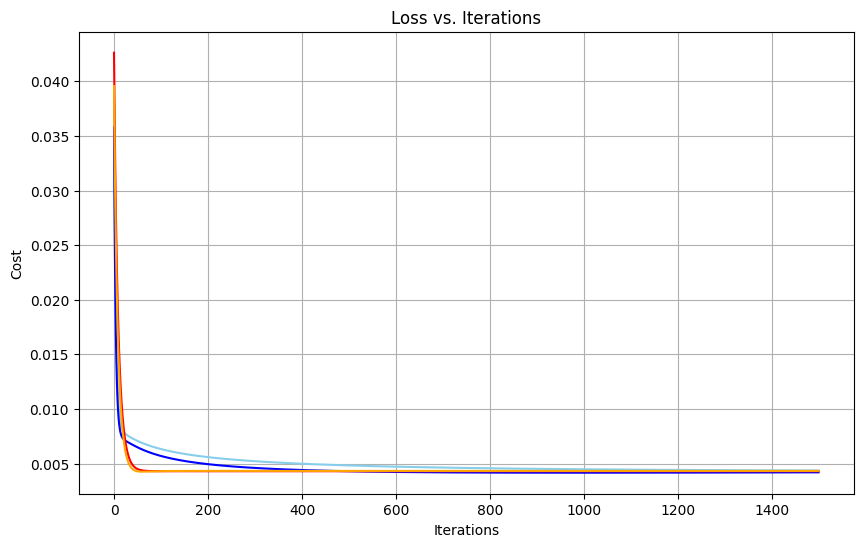

In [214]:
## The assignment calls for a 80/20 train/test split
np.random.seed(0) # is this necessary?
data_train, data_test = train_test_split(housing_data, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

# Normalization
scaler_norm = MinMaxScaler()
X2_train_norm = scaler_norm.fit_transform(X_train)
X2_test_norm  = scaler_norm.transform(X_test)

X2_train_norm = np.column_stack((np.ones(X2_train_norm.shape[0]), X2_train_norm))
X2_test_norm  = np.column_stack((np.ones(X2_test_norm.shape[0]), X2_test_norm))

theta_norm = np.zeros((X2_train_norm.shape[1], 1))
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(X2_train_norm, y_train, X2_test_norm, y_test, theta_norm, alpha, iterations)

# Standarization
scaler_stdzd = StandardScaler()
X2_train_stdzd = scaler_stdzd.fit_transform(X_train)
X2_test_stdzd  = scaler_stdzd.transform(X_test)

X2_train_stdzd = np.column_stack((np.ones(X2_train_stdzd.shape[0]), X2_train_stdzd))
X2_test_stdzd  = np.column_stack((np.ones(X2_test_stdzd.shape[0]), X2_test_stdzd))

theta_stdzd = np.zeros((X2_train_stdzd.shape[1], 1))
theta_stdzd, train_cost_stdzd, test_cost_stdzd = gradient_descent(X2_train_stdzd, y_train, X2_test_stdzd, y_test, theta_stdzd, alpha, iterations)

# calculate linear regression for feature matrix using gradient descent
print('For variables area, bedrooms, bathrooms, stories, parking')
print('Final value of theta for normalized dataset =', theta_norm)
print('Final value of theta for standardized dataset =', theta_stdzd)
print('for normalized training dataset, cost_history =', train_cost_history[-1])
print('for normalized validation dataset, cost_history =', test_cost_history[-1])
print('for standardized training dataset, cost_history =', train_cost_history[-1])
print('for standardized validation dataset, cost_history =', test_cost_history[-1])
print('\n')

# Data Visualization
plt.clf()
plt.plot(range(iterations), train_cost_norm, color='skyblue')
plt.plot(range(iterations), test_cost_norm, color='blue')
plt.plot(range(iterations), train_cost_stdzd, color='red')
plt.plot(range(iterations), test_cost_stdzd, color='orange')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Loss vs. Iterations')
plt.grid(True)
plt.show()

2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results.

For variables area, bedrooms, bathrooms, stories, parking
Final value of theta for normalized dataset = [[0.00147502]
 [0.        ]
 [0.2382325 ]
 [0.06522106]
 [0.25996873]
 [0.11154345]
 [0.05740092]
 [0.03889865]
 [0.02584072]
 [0.07934757]
 [0.07935955]
 [0.08175861]
 [0.05594393]]
Final value of theta for standardized dataset = [[0.2636995 ]
 [0.        ]
 [0.04613296]
 [0.0062963 ]
 [0.05008587]
 [0.03182794]
 [0.01820749]
 [0.01264496]
 [0.01259011]
 [0.01774533]
 [0.03462399]
 [0.01926386]
 [0.02214064]]
for normalized training dataset, cost_history = 0.004374066080512173
for normalized validation dataset, cost_history = 0.0042074839580458784
for standardized training dataset, cost_history = 0.004374066080512173
for standardized validation dataset, cost_history = 0.0042074839580458784




/tmp/ipython-input-2300131906.py:48: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


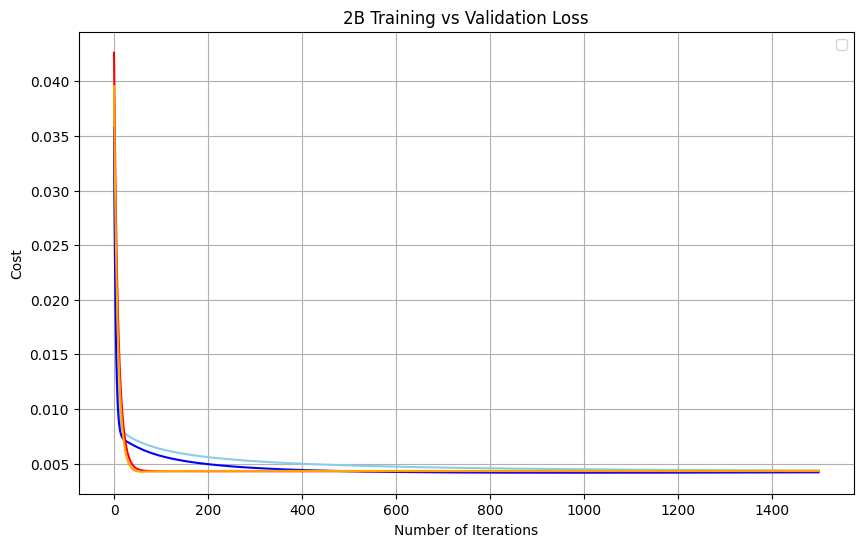

In [215]:
data_train, data_test = train_test_split(housing_data, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

y_train = data_train.pop('price').values.reshape(-1,1)
X_train = data_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

y_test = data_test.pop('price').values.reshape(-1,1)
X_test = data_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].values
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Normalization
scaler_norm = MinMaxScaler()
X2_train_norm = scaler_norm.fit_transform(X_train)
X2_test_norm  = scaler_norm.transform(X_test)
X2_train_norm = np.column_stack((np.ones(X2_train_norm.shape[0]), X2_train_norm))
X2_test_norm  = np.column_stack((np.ones(X2_test_norm.shape[0]), X2_test_norm))
theta_norm = np.zeros((X2_train_norm.shape[1], 1))
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(X2_train_norm, y_train, X2_test_norm, y_test, theta_norm, alpha, iterations)

# Standarization
scaler_stdzd = StandardScaler()
X2_train_stdzd = scaler_stdzd.fit_transform(X_train)
X2_test_stdzd  = scaler_stdzd.transform(X_test)
X2_train_stdzd = np.column_stack((np.ones(X2_train_stdzd.shape[0]), X2_train_stdzd))
X2_test_stdzd  = np.column_stack((np.ones(X2_test_stdzd.shape[0]), X2_test_stdzd))
theta_stdzd = np.zeros((X2_train_stdzd.shape[1], 1))
theta_stdzd, train_cost_stdzd, test_cost_stdzd = gradient_descent(X2_train_stdzd, y_train, X2_test_stdzd, y_test, theta_stdzd, alpha, iterations)

print('For variables area, bedrooms, bathrooms, stories, parking')
print('Final value of theta for normalized dataset =', theta_norm)
print('Final value of theta for standardized dataset =', theta_stdzd)
print('for normalized training dataset, cost_history =', train_cost_history[-1])
print('for normalized validation dataset, cost_history =', test_cost_history[-1])
print('for standardized training dataset, cost_history =', train_cost_history[-1])
print('for standardized validation dataset, cost_history =', test_cost_history[-1])
print('\n')

# Data Visualization
plt.clf()
plt.plot(range(iterations), train_cost_norm, color='skyblue')
plt.plot(range(iterations), test_cost_norm, color='blue')
plt.plot(range(iterations), train_cost_stdzd, color='red')
plt.plot(range(iterations), test_cost_stdzd, color='orange')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.title('2B Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Problem 3

3.a) Repeat problem 2 a, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 a.

/tmp/ipython-input-503981582.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


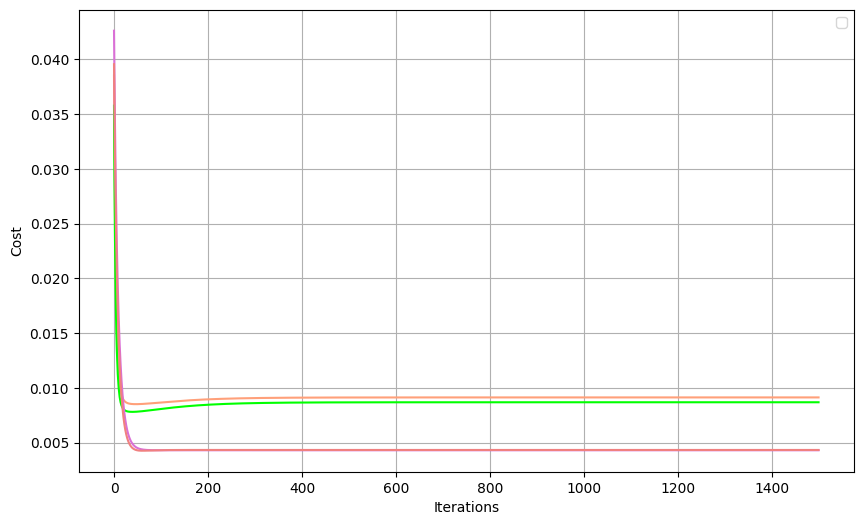

In [216]:
df_train, df_test = train_test_split(housing_data, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lam):
  m = len(y_train)
  train_cost_history = np.zeros(iterations)
  valid_cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X_train.dot(theta)
    errors = np.subtract(predictions, y_train)
    sum_delta = (alpha / m) * X_train.transpose().dot(errors)
    sum_delta[1:] += (lam/m) * theta[1:]
    theta = theta - sum_delta
    train_cost_history[i] = compute_cost(X_train, y_train, theta)
    valid_cost_history[i] = compute_cost(X_test, y_test, theta)
  return theta, train_cost_history, valid_cost_history

# Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm  = scaler_norm.transform(X_test)
X_train_norm = np.column_stack((np.ones(X_train_norm.shape[0]), X_train_norm))
X_test_norm  = np.column_stack((np.ones(X_test_norm.shape[0]), X_test_norm))
theta_norm = np.zeros((X_train_norm.shape[1], 1))
lamda = 10
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, theta_norm, alpha, iterations, lamda)

# Regularization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)
X_train_std = np.column_stack((np.ones(X_train_std.shape[0]), X_train_std))
X_test_std  = np.column_stack((np.ones(X_test_std.shape[0]), X_test_std))
theta = np.zeros((X_train_std.shape[1], 1))
lamda = 0.1
theta_reg, train_cost_reg, test_cost_reg = gradient_descent(X_train_std, y_train, X_test_std, y_test, theta, alpha, iterations, lamda)

# Data Visualization
plt.clf()
plt.plot(range(iterations), train_cost_norm, color='lightsalmon')
plt.plot(range(iterations), test_cost_norm, color='lime')
plt.plot(range(iterations), train_cost_std, color='orchid')
plt.plot(range(iterations), test_cost_std, color='lightcoral')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

3. b) Repeat problem 2 b, this time by adding a parameters penalty to your loss function. Note that in this case, you need to modify the gradient decent logic for your training set, but you don’t need to change your loss for the evaluation set.  

Plot your results (both training and evaluation losses) for the best input scaling approach (standardization or normalization). Explain your results and compare them against problem 2 b.

/tmp/ipython-input-2547893028.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


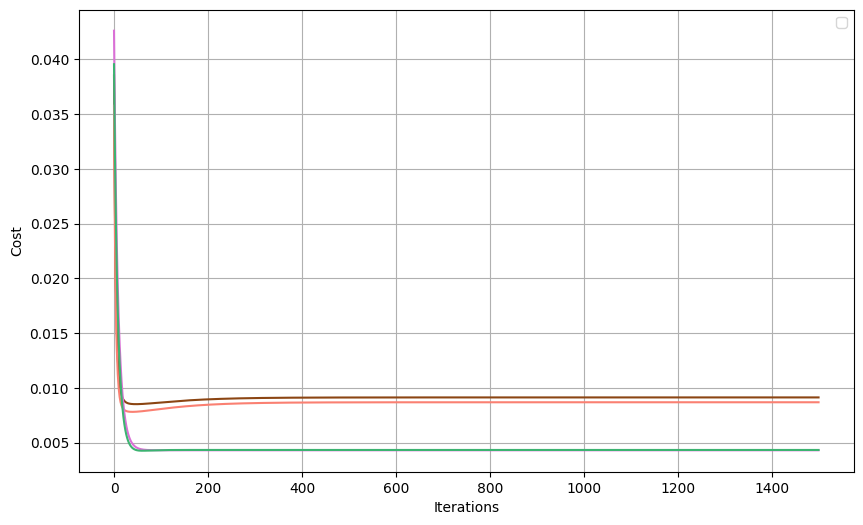

In [217]:
df_train, df_test = train_test_split(housing_data, train_size = 0.8, test_size = 0.2, random_state = 100)
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','price']

def gradient_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lam=0.1):
  m = len(y_train)
  train_cost_history = np.zeros(iterations)
  valid_cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X_train.dot(theta)
    errors = np.subtract(predictions, y_train)
    sum_delta = (alpha / m) * X_train.transpose().dot(errors)
    sum_delta[1:] += (lam/m) * theta[1:]
    theta = theta - sum_delta
    train_cost_history[i] = compute_cost(X_train, y_train, theta)
    valid_cost_history[i] = compute_cost(X_test, y_test, theta)
  return theta, train_cost_history, valid_cost_history

# Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_test_norm  = scaler_norm.transform(X_test)
X_train_norm = np.column_stack((np.ones(X_train_norm.shape[0]), X_train_norm))
X_test_norm  = np.column_stack((np.ones(X_test_norm.shape[0]), X_test_norm))
theta_norm = np.zeros((X_train_norm.shape[1], 1))
lamda = 10
theta_norm, train_cost_norm, test_cost_norm = gradient_descent(X_train_norm, y_train, X_test_norm, y_test, theta_norm, alpha, iterations, lamda)

# Regularization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std  = scaler_std.transform(X_test)
X_train_std = np.column_stack((np.ones(X_train_std.shape[0]), X_train_std))
X_test_std  = np.column_stack((np.ones(X_test_std.shape[0]), X_test_std))
theta_std = np.zeros((X_train_std.shape[1], 1))
lamda = 10
theta_reg, train_cost_reg, test_cost_reg = gradient_descent(X_train_std, y_train, X_test_std, y_test, theta_std, alpha, iterations, lamda)

# Data Visualization
plt.clf()
plt.plot(range(iterations), train_cost_norm, color='saddlebrown')
plt.plot(range(iterations), test_cost_norm, color='salmon')
plt.plot(range(iterations), train_cost_std, color='orchid')
plt.plot(range(iterations), test_cost_std, color='mediumseagreen')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()